In [1]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)

import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image

# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import time_evo
from core.schmidt_solve import compute_schmidt_states_all_time
from core.eigen_ener_states import eigen_ener_states as eig
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse_gif
from utils.collapse_gif import collapse_gif
from utils.display_gif import display_gif
from utils.distribution_gif import gif_distribution_eig_total
from utils.plot import plot_basic
from utils.plot import plot_with_binning
from utils.basic_functions import state_distribution_eig_tot
from utils.overlap import overlap
from utils.overlap import gif_schmidt_overlap
from utils.interference import interference_plot
from utils.expectations import exp_val_time

In [7]:
# Setting parameters for simulation TODO make a config file for this.

d1 = 10; d2 = 200; E_spacing = 1.0; E_int = 0.03; E_int2 = 0; E_env = 1; E_env2 = 0; w = [0,0,0,np.sqrt(0.3),0,0,0,np.sqrt(0.7),0,0]; envi=[0]; tmax = 10; ind_nb = 100; log = 0
env_sys=0
# Running the simulation and running the core functions
result, tlist, H_list, ket_list, info = time_evo(d1,d2,E_spacing, E_int, E_int2, E_env, E_env2,w,envi, tmax, ind_nb,log)
eigen = eig(H_list)
s_list = compute_schmidt_states_all_time(result, ind_nb)
ss_list = s_list[0]
se_list= s_list[1]
sv_list = s_list[2]
s_full_list=s_list[3]

In [8]:
[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, info)

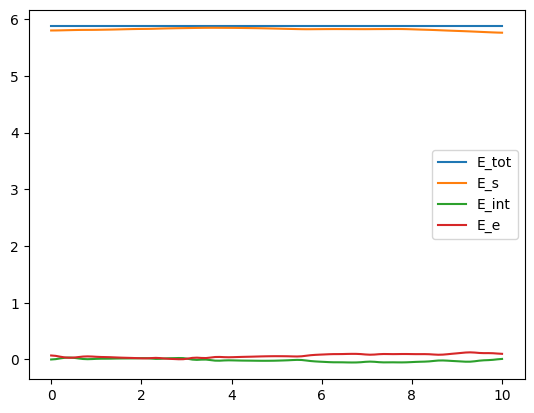

In [9]:
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)
plt.legend(["E_tot","E_s","E_int","E_e"])

So,to test thermalization I need to start my system in a coherent state + an enery eigenstate of the environment hamiltonian.
I may need tomodify the hamiltonians as well. because H_s = SHO, and qs = hamiltonian with position eigenstates.
Thisis not interesting yet because the system has no self interaction.

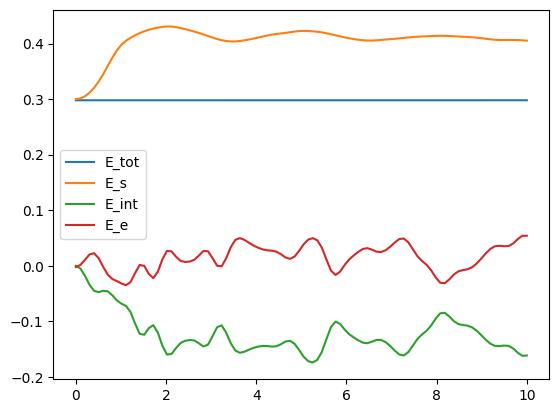

In [14]:
# Setting parameters for simulation TODO make a config file for this.
d1 = 10; d2 = 200; E_spacing = 0.1; E_int = 0.13; E_int2 = 0; E_env = 0.1; E_env2 = 0; w = [0,0,0,1,0,0,0,0,0,0]; envi=[0]; tmax = 10; ind_nb = 100; log = 0
env_sys=0
# Running the simulation and running the core functions
result, tlist, H_list, ket_list, info = time_evo(d1,d2,E_spacing, E_int, E_int2, E_env, E_env2,w,envi, tmax, ind_nb,log=1)
eigen = eig(H_list)
[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, info)
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)
plt.legend(["E_tot","E_s","E_int","E_e"])

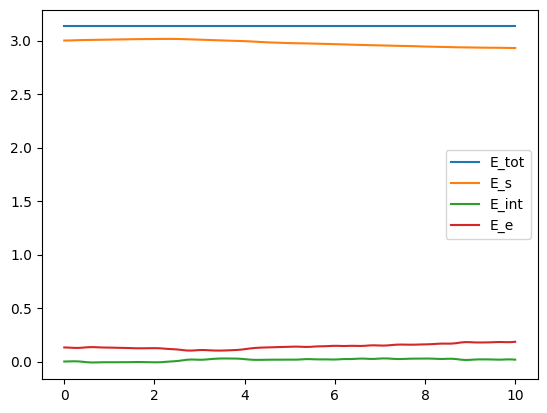

In [11]:
# Setting parameters for simulation TODO make a config file for this.
d1 = 10; d2 = 200; E_spacing = 1.0; E_int = 0.03; E_int2 = 0; E_env = 1; E_env2 = 0; w = [0,0,0,1,0,0,0,0,0,0]; envi=[0]; tmax = 10; ind_nb = 100; log = 0
env_sys=0
# Running the simulation and running the core functions
result, tlist, H_list, ket_list, info = time_evo(d1,d2,E_spacing, E_int, E_int2, E_env, E_env2,w,envi, tmax, ind_nb,log,0.5)
eigen = eig(H_list)
[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, info)
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)
plt.legend(["E_tot","E_s","E_int","E_e"])

Now we work with the real ACL model. 
And use the same values as Andy. 30 and 600